In [1]:
#Import Libraries
import numpy as np #Numerical Operations
import pandas as pd #Dataframe
import tensorflow as tf
import seaborn as sns #Data Visualiation
import matplotlib.pyplot as plt #Data Visualiation

In [2]:
df=pd.read_csv("eeg_updated.csv")

In [3]:
df.head()


,Unnamed: 0,video_id,subject_id,EEG.AF3,EEG.F7,EEG.F3,EEG.FC5,EEG.T7,EEG.P7,EEG.O1,...,POW.AF4.Theta,POW.AF4.Alpha,POW.AF4.BetaL,POW.AF4.BetaH,POW.AF4.Gamma,subject_understood,Age,Education Level,Fields of Interest,Title
0,0,0,0,4210.641113,4179.102539,4287.948730,4235.384766,4207.948730,4165.000000,4135.897461,...,1.801014,1.504794,0.258570,0.435745,0.469483,Not Understood,23,University (4th year),Business,Quantum Physics
1,1,0,0,4201.025879,4188.717773,4280.128418,4236.922852,4209.615234,4152.436035,4130.128418,...,1.859177,1.379617,0.317579,0.468416,0.642560,Not Understood,23,University (4th year),Business,Quantum Physics
2,2,0,0,4203.205078,4182.820313,4282.820313,4231.025879,4207.820313,4172.436035,4131.538574,...,2.027946,1.283876,0.441925,0.494701,0.798197,Not Understood,23,University (4th year),Business,Quantum Physics
3,3,0,0,4186.538574,4168.717773,4266.794922,4229.230957,4202.179688,4155.384766,4128.333496,...,2.265952,1.306188,0.616881,0.506062,0.886495,Not Understood,23,University (4th year),Business,Quantum Physics
4,4,0,0,4232.436035,4216.922852,4306.922852,4270.769043,4217.436035,4166.538574,4155.897461,...,2.461205,1.522420,0.822598,0.498361,0.874455,Not Understood,23,University (4th year),Business,Quantum Physics


In [4]:
df.shape

(68831, 92)

In [5]:
df.columns

Index(['Unnamed: 0', 'video_id', 'subject_id', 'EEG.AF3', 'EEG.F7', 'EEG.F3',
       'EEG.FC5', 'EEG.T7', 'EEG.P7', 'EEG.O1', 'EEG.O2', 'EEG.P8', 'EEG.T8',
       'EEG.FC6', 'EEG.F4', 'EEG.F8', 'EEG.AF4', 'POW.AF3.Theta',
       'POW.AF3.Alpha', 'POW.AF3.BetaL', 'POW.AF3.BetaH', 'POW.AF3.Gamma',
       'POW.F7.Theta', 'POW.F7.Alpha', 'POW.F7.BetaL', 'POW.F7.BetaH',
       'POW.F7.Gamma', 'POW.F3.Theta', 'POW.F3.Alpha', 'POW.F3.BetaL',
       'POW.F3.BetaH', 'POW.F3.Gamma', 'POW.FC5.Theta', 'POW.FC5.Alpha',
       'POW.FC5.BetaL', 'POW.FC5.BetaH', 'POW.FC5.Gamma', 'POW.T7.Theta',
       'POW.T7.Alpha', 'POW.T7.BetaL', 'POW.T7.BetaH', 'POW.T7.Gamma',
       'POW.P7.Theta', 'POW.P7.Alpha', 'POW.P7.BetaL', 'POW.P7.BetaH',
       'POW.P7.Gamma', 'POW.O1.Theta', 'POW.O1.Alpha', 'POW.O1.BetaL',
       'POW.O1.BetaH', 'POW.O1.Gamma', 'POW.O2.Theta', 'POW.O2.Alpha',
       'POW.O2.BetaL', 'POW.O2.BetaH', 'POW.O2.Gamma', 'POW.P8.Theta',
       'POW.P8.Alpha', 'POW.P8.BetaL', 'POW.P8.BetaH', 'POW

In [6]:
df.Title.values

array(['Quantum Physics', 'Quantum Physics', 'Quantum Physics', ...,
       'Classical Mythology', 'Classical Mythology',
       'Classical Mythology'], dtype=object)

In [7]:
df=df.drop(['Unnamed: 0','Age','subject_id','video_id','Education Level','Title','Fields of Interest'],axis=1)

In [11]:
df=df.drop(['POW.AF3.Theta',
       'POW.AF3.Alpha', 'POW.AF3.BetaL', 'POW.AF3.BetaH', 'POW.AF3.Gamma',
       'POW.F7.Theta', 'POW.F7.Alpha', 'POW.F7.BetaL', 'POW.F7.BetaH',
       'POW.F7.Gamma', 'POW.F3.Theta', 'POW.F3.Alpha', 'POW.F3.BetaL',
       'POW.F3.BetaH', 'POW.F3.Gamma', 'POW.FC5.Theta', 'POW.FC5.Alpha',
       'POW.FC5.BetaL', 'POW.FC5.BetaH', 'POW.FC5.Gamma', 'POW.T7.Theta',
       'POW.T7.Alpha', 'POW.T7.BetaL', 'POW.T7.BetaH', 'POW.T7.Gamma',
       'POW.P7.Theta', 'POW.P7.Alpha', 'POW.P7.BetaL', 'POW.P7.BetaH',
       'POW.P7.Gamma', 'POW.O1.Theta', 'POW.O1.Alpha', 'POW.O1.BetaL',
       'POW.O1.BetaH', 'POW.O1.Gamma', 'POW.O2.Theta', 'POW.O2.Alpha',
       'POW.O2.BetaL', 'POW.O2.BetaH', 'POW.O2.Gamma', 'POW.P8.Theta',
       'POW.P8.Alpha', 'POW.P8.BetaL', 'POW.P8.BetaH', 'POW.P8.Gamma',
       'POW.T8.Theta', 'POW.T8.Alpha', 'POW.T8.BetaL', 'POW.T8.BetaH',
       'POW.T8.Gamma', 'POW.FC6.Theta', 'POW.FC6.Alpha', 'POW.FC6.BetaL',
       'POW.FC6.BetaH', 'POW.FC6.Gamma', 'POW.F4.Theta', 'POW.F4.Alpha',
       'POW.F4.BetaL', 'POW.F4.BetaH', 'POW.F4.Gamma', 'POW.F8.Theta',
       'POW.F8.Alpha', 'POW.F8.BetaL', 'POW.F8.BetaH', 'POW.F8.Gamma',
       'POW.AF4.Theta', 'POW.AF4.Alpha', 'POW.AF4.BetaL', 'POW.AF4.BetaH',
       'POW.AF4.Gamma'],axis=1)

In [12]:
df.head()

,EEG.AF3,EEG.F7,EEG.F3,EEG.FC5,EEG.T7,EEG.P7,EEG.O1,EEG.O2,EEG.P8,EEG.T8,EEG.FC6,EEG.F4,EEG.F8,EEG.AF4,subject_understood
0,4210.641113,4179.102539,4287.948730,4235.384766,4207.948730,4165.000000,4135.897461,4170.000000,4155.384766,4157.179688,4610.384766,4388.846191,4413.461426,4499.743652,0
1,4201.025879,4188.717773,4280.128418,4236.922852,4209.615234,4152.436035,4130.128418,4149.487305,4149.487305,4157.820313,4583.717773,4376.666504,4392.820313,4488.461426,0
2,4203.205078,4182.820313,4282.820313,4231.025879,4207.820313,4172.436035,4131.538574,4147.948730,4131.666504,4131.666504,4574.743652,4377.051270,4390.512695,4483.077148,0
3,4186.538574,4168.717773,4266.794922,4229.230957,4202.179688,4155.384766,4128.333496,4151.666504,4136.666504,4134.230957,4565.512695,4362.436035,4380.897461,4471.025879,0
4,4232.436035,4216.922852,4306.922852,4270.769043,4217.436035,4166.538574,4155.897461,4162.820313,4143.461426,4154.487305,4612.436035,4403.333496,4410.641113,4512.179688,0


In [9]:
df['subject_understood'].replace(['Not Understood', 'Understood'],
                        [0, 1], inplace=True)

In [13]:
df.head()

,EEG.AF3,EEG.F7,EEG.F3,EEG.FC5,EEG.T7,EEG.P7,EEG.O1,EEG.O2,EEG.P8,EEG.T8,EEG.FC6,EEG.F4,EEG.F8,EEG.AF4,subject_understood
0,4210.641113,4179.102539,4287.948730,4235.384766,4207.948730,4165.000000,4135.897461,4170.000000,4155.384766,4157.179688,4610.384766,4388.846191,4413.461426,4499.743652,0
1,4201.025879,4188.717773,4280.128418,4236.922852,4209.615234,4152.436035,4130.128418,4149.487305,4149.487305,4157.820313,4583.717773,4376.666504,4392.820313,4488.461426,0
2,4203.205078,4182.820313,4282.820313,4231.025879,4207.820313,4172.436035,4131.538574,4147.948730,4131.666504,4131.666504,4574.743652,4377.051270,4390.512695,4483.077148,0
3,4186.538574,4168.717773,4266.794922,4229.230957,4202.179688,4155.384766,4128.333496,4151.666504,4136.666504,4134.230957,4565.512695,4362.436035,4380.897461,4471.025879,0
4,4232.436035,4216.922852,4306.922852,4270.769043,4217.436035,4166.538574,4155.897461,4162.820313,4143.461426,4154.487305,4612.436035,4403.333496,4410.641113,4512.179688,0


In [14]:
df.describe()

,EEG.AF3,EEG.F7,EEG.F3,EEG.FC5,EEG.T7,EEG.P7,EEG.O1,EEG.O2,EEG.P8,EEG.T8,EEG.FC6,EEG.F4,EEG.F8,EEG.AF4,subject_understood
count,68831.000000,68831.000000,68831.000000,68831.000000,68831.000000,68831.000000,68831.000000,68831.000000,68831.000000,68831.000000,68831.000000,68831.000000,68831.000000,68831.000000,68831.000000
mean,4276.496212,4257.994590,4302.803482,4292.027479,4302.093465,4243.397476,4231.846947,4240.153361,4228.921293,4227.328318,4495.170125,4394.501956,4372.054054,4440.803304,0.789906
std,115.584631,140.884855,113.720961,135.578849,117.727171,118.189886,115.590762,137.366806,121.992155,112.405972,160.121525,128.326724,146.867287,126.357635,0.407378
min,1030.769287,805.384644,1320.769287,806.538452,1904.487183,1710.769287,1794.871826,1466.538452,1617.051270,1314.743530,697.948730,1070.256470,1037.948730,2112.307617,0.000000
25%,4258.461426,4236.410156,4283.205078,4273.077148,4282.436035,4220.769043,4211.602539,4218.205078,4207.179688,4202.179688,4455.641113,4373.589844,4347.948730,4409.743652,1.000000
50%,4287.307617,4266.538574,4305.897461,4297.436035,4312.179688,4253.846191,4244.487305,4252.948730,4243.461426,4242.692383,4488.461426,4398.333496,4372.307617,4436.410156,1.000000
75%,4311.153809,4296.153809,4327.692383,4322.563965,4342.179688,4282.820313,4271.794922,4279.615234,4268.846191,4269.871582,4519.871582,4423.846191,4396.666504,4464.358887,1.000000
max,6238.077148,7599.615234,6291.794922,7600.128418,7599.615234,6695.641113,7525.128418,7611.025879,6159.487305,6221.794922,7713.589844,7604.487305,7603.205078,7600.897461,1.000000


In [15]:
import numpy as np
from scipy import stats
df_zscore = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

In [16]:
import pandas as pd

def remove_outliers(df,columns,n_std):
    for col in columns:
        print('Working on column: {}'.format(col))
        
        mean = df[col].mean()
        sd = df[col].std()
        
        df = df[(df[col] <= mean+(n_std*sd))]
        
    return df

In [17]:
columns = df.columns
n_std = 4
df_no_outliers = remove_outliers(df_zscore, columns, n_std)

Working on column: EEG.AF3
Working on column: EEG.F7
Working on column: EEG.F3
Working on column: EEG.FC5
Working on column: EEG.T7
Working on column: EEG.P7
Working on column: EEG.O1
Working on column: EEG.O2
Working on column: EEG.P8
Working on column: EEG.T8
Working on column: EEG.FC6
Working on column: EEG.F4
Working on column: EEG.F8
Working on column: EEG.AF4
Working on column: subject_understood


In [18]:
df_no_outliers.shape

(61801, 15)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='subject_understood'>

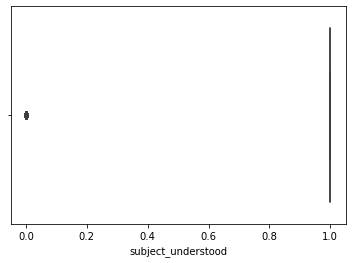

In [19]:
import seaborn as sns
sns.boxplot(df_no_outliers['subject_understood'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EEG.T7', ylabel='Density'>

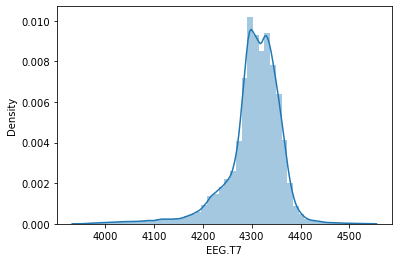

In [21]:
import seaborn as sns
sns.distplot(df_no_outliers['EEG.T7'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='EEG.T7'>

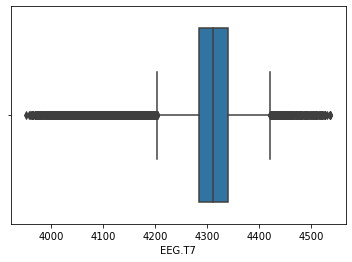

In [22]:
import seaborn as sns
sns.boxplot(df_no_outliers['EEG.T7'])

In [23]:
X = df_no_outliers.drop('subject_understood', axis=1)

Y = df_no_outliers['subject_understood']

In [24]:
Y

0        0
1        0
2        0
3        0
4        0
        ..
68826    1
68827    1
68828    1
68829    1
68830    1
Name: subject_understood, Length: 61801, dtype: int64

In [25]:
X

,EEG.AF3,EEG.F7,EEG.F3,EEG.FC5,EEG.T7,EEG.P7,EEG.O1,EEG.O2,EEG.P8,EEG.T8,EEG.FC6,EEG.F4,EEG.F8,EEG.AF4
0,4210.641113,4179.102539,4287.948730,4235.384766,4207.948730,4165.000000,4135.897461,4170.000000,4155.384766,4157.179688,4610.384766,4388.846191,4413.461426,4499.743652
1,4201.025879,4188.717773,4280.128418,4236.922852,4209.615234,4152.436035,4130.128418,4149.487305,4149.487305,4157.820313,4583.717773,4376.666504,4392.820313,4488.461426
2,4203.205078,4182.820313,4282.820313,4231.025879,4207.820313,4172.436035,4131.538574,4147.948730,4131.666504,4131.666504,4574.743652,4377.051270,4390.512695,4483.077148
3,4186.538574,4168.717773,4266.794922,4229.230957,4202.179688,4155.384766,4128.333496,4151.666504,4136.666504,4134.230957,4565.512695,4362.436035,4380.897461,4471.025879
4,4232.436035,4216.922852,4306.922852,4270.769043,4217.436035,4166.538574,4155.897461,4162.820313,4143.461426,4154.487305,4612.436035,4403.333496,4410.641113,4512.179688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68826,4353.846191,4349.487305,4317.563965,4343.461426,4375.641113,4296.025879,4351.666504,4309.358887,4287.436035,4253.589844,4410.128418,4404.871582,4334.871582,4389.615234
68827,4335.769043,4326.538574,4310.641113,4331.153809,4363.333496,4297.179688,4336.025879,4282.563965,4276.410156,4260.641113,4415.641113,4395.897461,4342.948730,4391.794922
68828,4321.666504,4313.205078,4310.000000,4310.384766,4357.436035,4296.025879,4337.563965,4291.153809,4275.256348,4265.384766,4429.743652,4406.025879,4362.051270,4410.897461
68829,4334.615234,4316.666504,4318.717773,4339.102539,4370.512695,4297.436035,4333.461426,4297.051270,4281.922852,4266.666504,4452.307617,4412.051270,4373.205078,4399.102539


In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=100)

In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [28]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))
ann.add(tf.keras.layers.Dense(units=1,activation="relu"))

In [29]:
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [30]:
ann.fit(X_train,Y_train,batch_size=32,epochs = 100)

Epoch 1/100
966/966 [==============================] - 2s 1ms/step - loss: 2.0782 - accuracy: 0.7490
Epoch 2/100
966/966 [==============================] - 1s 1ms/step - loss: 1.3536 - accuracy: 0.8099
Epoch 3/100
966/966 [==============================] - 1s 1ms/step - loss: 0.9050 - accuracy: 0.8194
Epoch 4/100
966/966 [==============================] - 1s 1ms/step - loss: 0.8210 - accuracy: 0.8348
Epoch 5/100
966/966 [==============================] - 1s 1ms/step - loss: 0.8004 - accuracy: 0.8387
Epoch 6/100
966/966 [==============================] - 1s 1ms/step - loss: 0.7843 - accuracy: 0.8457
Epoch 7/100
966/966 [==============================] - 1s 1ms/step - loss: 0.7717 - accuracy: 0.8548
Epoch 8/100
966/966 [==============================] - 1s 1ms/step - loss: 0.7623 - accuracy: 0.8548
Epoch 9/100
966/966 [==============================] - 1s 1ms/step - loss: 0.7561 - accuracy: 0.8563
Epoch 10/100
966/966 [==============================] - 1s 2ms/step - loss: 0.7537 - accura

966/966 [==============================] - 1s 1ms/step - loss: 0.7187 - accuracy: 0.8901
Epoch 82/100
966/966 [==============================] - 1s 1ms/step - loss: 0.7189 - accuracy: 0.8931
Epoch 83/100
966/966 [==============================] - 1s 1ms/step - loss: 0.7135 - accuracy: 0.8916
Epoch 84/100
966/966 [==============================] - 2s 2ms/step - loss: 0.7311 - accuracy: 0.8853
Epoch 85/100
966/966 [==============================] - 2s 2ms/step - loss: 0.7226 - accuracy: 0.8861
Epoch 86/100
966/966 [==============================] - 1s 1ms/step - loss: 0.7639 - accuracy: 0.8746
Epoch 87/100
966/966 [==============================] - 1s 1ms/step - loss: 0.7165 - accuracy: 0.8912
Epoch 88/100
966/966 [==============================] - 1s 1ms/step - loss: 0.7102 - accuracy: 0.8933
Epoch 89/100
966/966 [==============================] - 1s 1ms/step - loss: 0.7110 - accuracy: 0.8936
Epoch 90/100
966/966 [==============================] - 1s 1ms/step - loss: 0.7140 - accuracy: 

In [31]:
ann.fit(X_test,Y_test,batch_size=32,epochs = 100)

Epoch 1/100
563/563 [==============================] - 1s 2ms/step - loss: 0.1166 - accuracy: 0.9849
Epoch 2/100
563/563 [==============================] - 1s 2ms/step - loss: 0.1132 - accuracy: 0.9850
Epoch 3/100
563/563 [==============================] - 1s 2ms/step - loss: 0.1044 - accuracy: 0.9858
Epoch 4/100
563/563 [==============================] - 1s 2ms/step - loss: 0.0715 - accuracy: 0.9889
Epoch 5/100
563/563 [==============================] - 1s 2ms/step - loss: 0.0552 - accuracy: 0.9901
Epoch 6/100
563/563 [==============================] - 1s 2ms/step - loss: 0.0545 - accuracy: 0.9913
Epoch 7/100
563/563 [==============================] - 1s 2ms/step - loss: 0.0733 - accuracy: 0.9873
Epoch 8/100
563/563 [==============================] - 1s 2ms/step - loss: 0.0513 - accuracy: 0.9906
Epoch 9/100
563/563 [==============================] - 1s 2ms/step - loss: 0.0467 - accuracy: 0.9922
Epoch 10/100
563/563 [==============================] - 1s 2ms/step - loss: 0.0459 - accura

In [32]:
X_test[0]

array([-0.42599667, -0.4400459 , -0.4415806 , -0.383146  , -0.58840144,
       -0.48982728, -0.63791242, -0.56252206, -0.83998271, -0.71360493,
       -0.18163765, -0.45281508, -0.25467296, -0.15904103])